# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
# Import your libraries
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [2]:
# Your code here
mean=50
sd=5
samples=[10,50,500,5000]
rand_samp=[[np.random.normal(mean,sd,n),n] for n in samples]
for i in range(len(rand_samp)):
    k2,p=stats.normaltest(rand_samp[i][0])
    print('-------------------------------------------------')
    print('')
    print(' >> Number of elements: ',rand_samp[i][1])
    print('')
    print('Chi squared probability: ',p)
    print('')
    testp=p<0.05
    print('Test (<0.05): ',p<0.05)
    print(' >>> ','Normal' if testp==False else 'Not Normal')
    

-------------------------------------------------

 >> Number of elements:  10

Chi squared probability:  0.7057132544724507

Test (<0.05):  False
 >>>  Normal
-------------------------------------------------

 >> Number of elements:  50

Chi squared probability:  0.5654759790890928

Test (<0.05):  False
 >>>  Normal
-------------------------------------------------

 >> Number of elements:  500

Chi squared probability:  0.9915495961897292

Test (<0.05):  False
 >>>  Normal
-------------------------------------------------

 >> Number of elements:  5000

Chi squared probability:  0.5450368827307259

Test (<0.05):  False
 >>>  Normal


/home/ivan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [3]:
# Testing for a loop of 1000 iterations
mean=50
sd=5
samples=[10,50,500,5000]
print('****************************************')
print('****************************************')
print('')
for itt in range(3):
    print('****************************************')
    print('')
    print('           ITERATION %s' %(itt+1))
    print('')
    print('****************************************')
    for i in range(len(samples)):
        p_list=[]
        for j in range(1000):
            rand_samp_test=np.random.normal(mean,sd,samples[i])
            k2,p=stats.normaltest(rand_samp_test)
            p_list.append(p)
        p_mean=np.mean(p_list)
        print('-------------------------------------------------')
        print('')
        print(' >> Number of elements: ',samples[i])
        print('')    
        print('Chi squared probability: ',p)
        print('')
        testp=p_mean<0.05
        print('Test (<0.05): ',p_mean<0.05)
        print(' >>> ','Normal' if testp==False else 'Not Normal')

****************************************
****************************************

****************************************

           ITERATION 1

****************************************
-------------------------------------------------

 >> Number of elements:  10

Chi squared probability:  0.6875407180724509

Test (<0.05):  False
 >>>  Normal
-------------------------------------------------

 >> Number of elements:  50

Chi squared probability:  0.9503127997752012

Test (<0.05):  False
 >>>  Normal
-------------------------------------------------

 >> Number of elements:  500

Chi squared probability:  0.6682967666960657

Test (<0.05):  False
 >>>  Normal
-------------------------------------------------

 >> Number of elements:  5000

Chi squared probability:  0.45797021251736847

Test (<0.05):  False
 >>>  Normal
****************************************

           ITERATION 2

****************************************
-------------------------------------------------

 >> Numb

#### Interpret the normaltest results and make your observations.

In [4]:
# Explain the test results here
# All depends on the threshold value we define for our hipothesis to check wherever we do not have a normal
# distribution. 'p' values from the test should be equal or major than this threshold to reject the hipothesis
# Threshold is usually defined as 0.05. So every 'p' value obtained over this threshold reject the hipothesis of
# not a normal distribution

#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

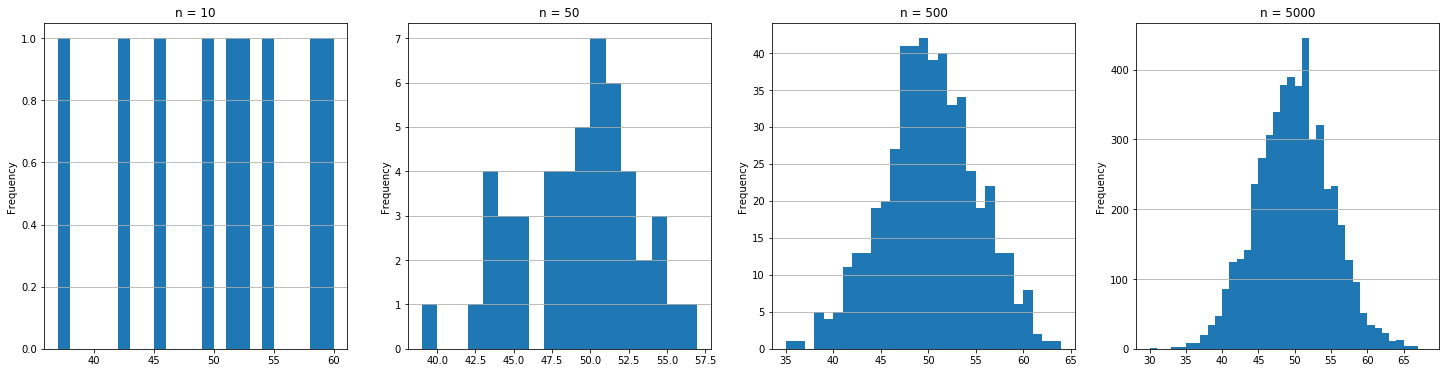

In [5]:
# Your code here
nsubs=len(rand_samp)

fig,axes=plt.subplots(1,nsubs,figsize=(25,6))

counter=-1
for distrib,samp in rand_samp:
    counter+=1
    axes[counter].hist(distrib,bins=np.arange(np.floor(min(distrib)),np.ceil(max(distrib)),1),align='mid')
    axes[counter].set_title('n = %s' %samp)
    axes[counter].yaxis.grid()
    axes[counter].set_ylabel('Frequency')


#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [6]:
# Your comment and explanation here
# All distributions have the mean on 50 or near it. This fits with central theorem where taking a random sample of elements of a distribution
# its mean values are near the mean, ad when we take more and more samples it returns on getting closer to the defined mean.

# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

Text(0.5, 0, 'Number of clicks')

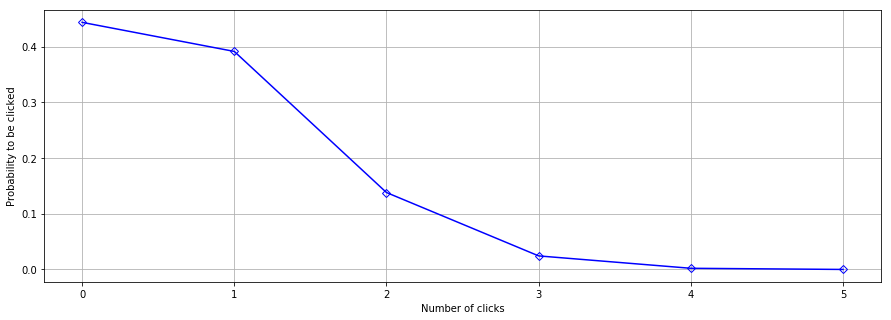

In [7]:
# Your code here
n, p = 5, 0.15
fig, ax = plt.subplots(1, 1,figsize=(15,5))
x=np.arange(0,n+1)
xl=x+1
ax.plot(x,stats.binom.pmf(x, n, p), 'b', label='binom pmf',marker='D',fillstyle='none')
ax.grid()
ax.set_ylabel('Probability to be clicked')
ax.set_xlabel('Number of clicks')

#### Explain what you observe from the plot above

In [8]:
# Your comment here
# It fits great! Don't know, seems that the probability for 1 click is the greater one, then the probability reduces and tend to zero

#### Now plot PMF with 50, 500, and 5000 visitors.

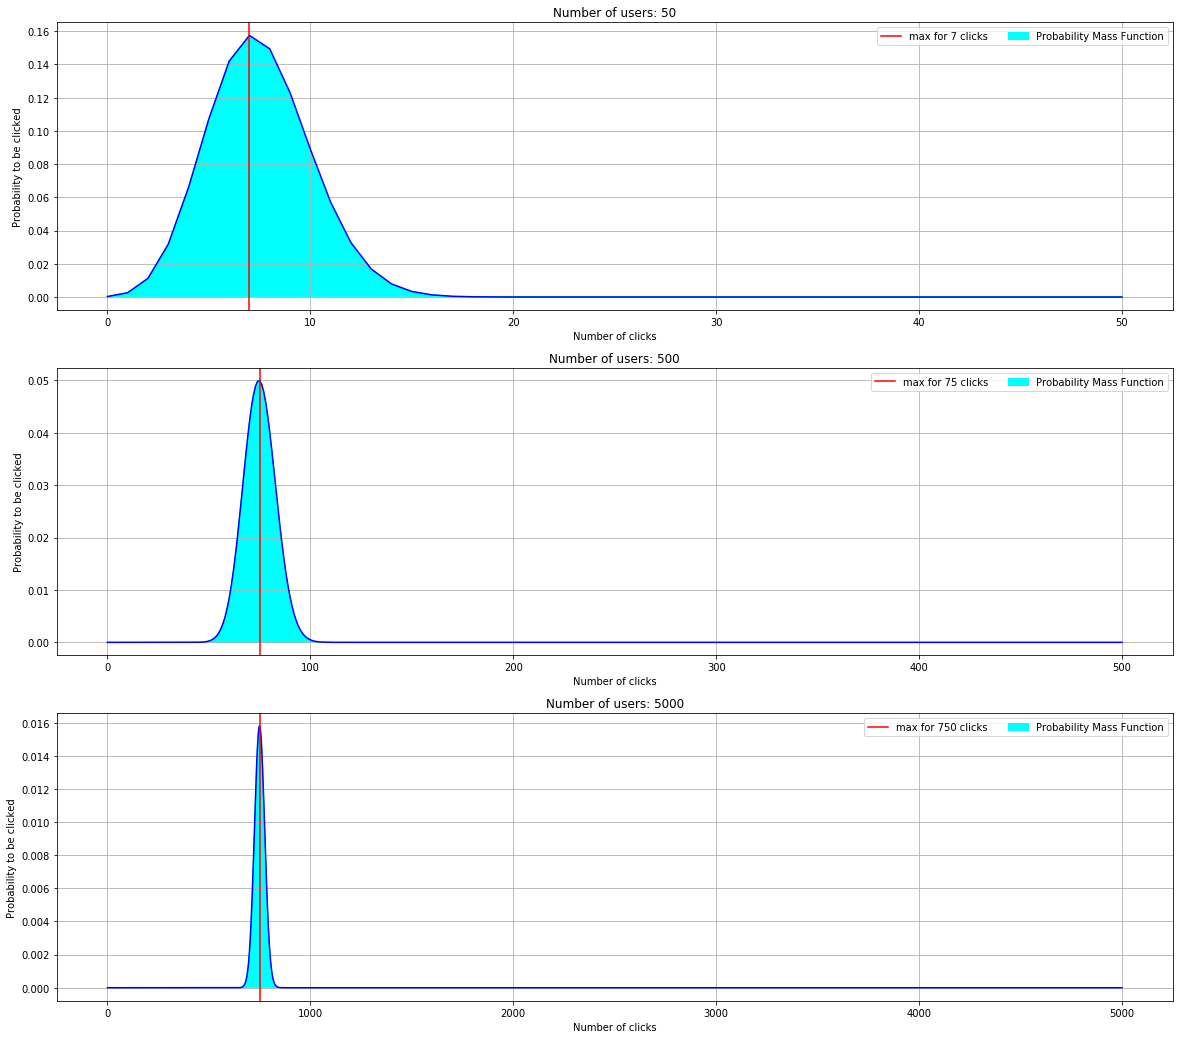

In [9]:
def ploting_crazy_binomial_PMF(k,binomial,num,k_max):
    ax[counter].plot(k,binomial,'b')
    ax[counter].grid()
    ax[counter].set_ylabel('Probability to be clicked')
    ax[counter].set_xlabel('Number of clicks')
    ax[counter].set_title('Number of users: %s' %num)
    ax[counter].fill(k,binomial,color='cyan',label='Probability Mass Function')
    ax[counter].axvline(x=k_max,color='red',label='max for %s clicks' %k_max[0])
    ax[counter].legend(ncol=2)

# Your code here
# Your code here
N=[50,500,5000]
n, p = 5, 0.15
counter=-1
fig, ax = plt.subplots(3, 1,figsize=(20,6*len(N)))
for num in N:
    counter+=1
    k=np.arange(0,num+1)
    binomial=stats.binom.pmf(k, num, p)
    max_ind=np.where(binomial==max(binomial))
    k_max=k[max_ind]
    ploting_crazy_binomial_PMF(k,binomial,num,k_max)

#### What did you notice from the distribution plots? Comment your findings.

In [10]:
# Your comment here
# Width of the curve raises when we have more samples but not by a linear relation. 

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [11]:
# Your comment here
# Poisson distribution is discret. It fits for modelling the number of times an event occurs in an interval of time or space

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [12]:
# Your code here
mean=300 # Mean visits per day

s_obj=320  # Study objective 

num_elements=100000

# First way to do it
poss=stats.poisson.rvs(300,size=num_elements)

def find_num(x,b,c):
    """
    returns the probability of finding an element (b) in an array (x) for  a defined number of elements
    """
    return len(x[x==b])/c

print('')
print('Creating an array via poisson formulae and asking for 320: ',np.mean([find_num(poss,s_obj,num_elements) for i in range(500)]))
# Second way with pmf
print('')
print('Probability mass function for %s:                         ' %s_obj,stats.poisson.pmf(s_obj,mean))


Creating an array via poisson formulae and asking for 320:  0.01174

Probability mass function for 320:                          0.011612348610402475


#### What is the probability of getting 60 visits?

In [13]:
# Your code here
s_obj=60
print('')
print('Creating an array via poisson formulae and asking for 320: ',np.mean([find_num(poss,s_obj,num_elements) for i in range(500)]))
# Second way with pmf
print('')
print('Probability mass function for %s:                         ' %s_obj,stats.poisson.pmf(s_obj,mean))


Creating an array via poisson formulae and asking for 320:  0.0

Probability mass function for 60:                          2.622743762294515e-64


#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

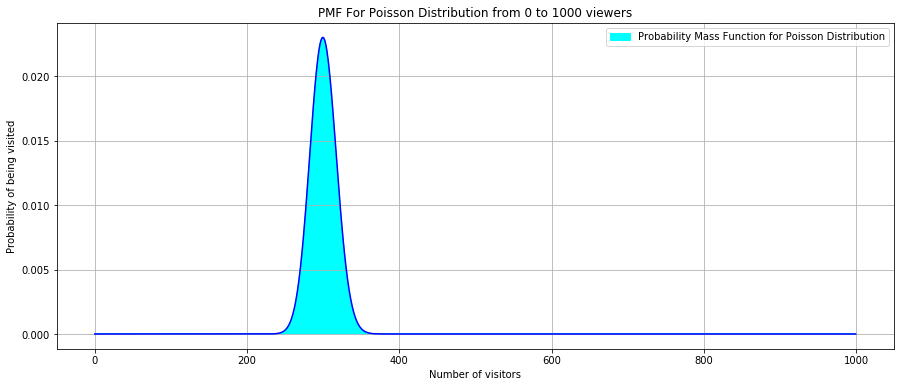

In [14]:
# your code here
k=range(0,1000) # Space of posibilities
poisson_distr=stats.poisson.pmf(k,mean) # Poisson distribution for k

fig,ax=plt.subplots(1,1,figsize=(15,6))
ax.plot(k,poisson_distr,'b')
ax.grid()
ax.set_ylabel('Probability of being visited')
ax.set_xlabel('Number of visitors')
ax.set_title('PMF For Poisson Distribution from 0 to 1000 viewers')
ax.fill(k,poisson_distr,color='cyan',label='Probability Mass Function for Poisson Distribution')
ax.legend(ncol=1)

___